### Import and Global settings:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
sns.set_palette("magma_r", 9)

### Loading the Dataset :

In [2]:
train = pd.read_csv('data/train.csv')
print("Dataset is ready for use!")

Dataset is ready for use!


### Adjusting the index :

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.set_index('PassengerId', inplace = True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Understanding the Data :

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


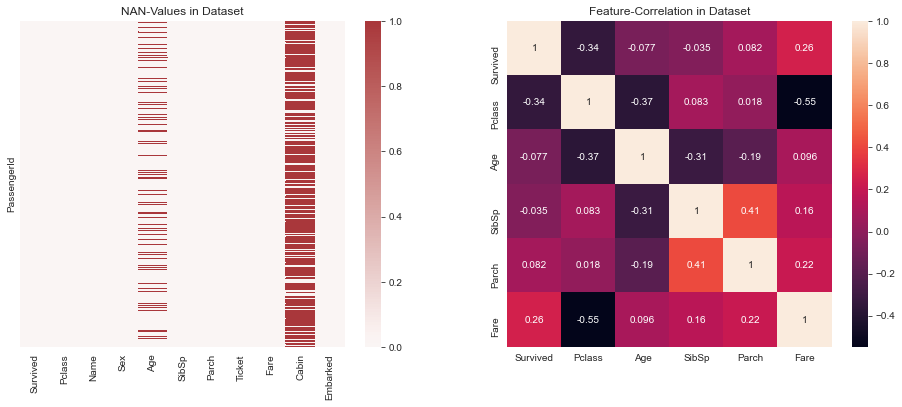

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='vlag', center=0, ax=ax[0])
ax[0].set_title("NAN-Values in Dataset")
sns.heatmap(train.corr(), annot=True, ax=ax[1])
ax[1].set_title("Feature-Correlation in Dataset")
plt.show()

### Understanding the Target Variable :

In [8]:
print("\nCount (Survived) :", 
      train[train['Survived'] == 1]['Survived'].count())
print("Percentage (Survived) :", 
      int(train[train['Survived'] == 1]['Survived'].count()/train['Survived'].count() * 100), "%")
print("Count (Did not survive) :",
      train[train['Survived'] == 0]['Survived'].count())
print("Percentage (Did not survive) :", 
      int(train[train['Survived'] == 0]['Survived'].count()/train['Survived'].count() * 100), "%")


Count (Survived) : 342
Percentage (Survived) : 38 %
Count (Did not survive) : 549
Percentage (Did not survive) : 61 %


> *Observation(s)* : **61 percent Passengers did not survive**, which amounts to almost double the survival rate.

### Understanding how the features are related :
    - Feature Analysis
    - Feature-to-Feature Analysis
    - Feature-to-Target Analysis    
    - Handling NAN values (if any)

### Pclass : (PassengerClass)

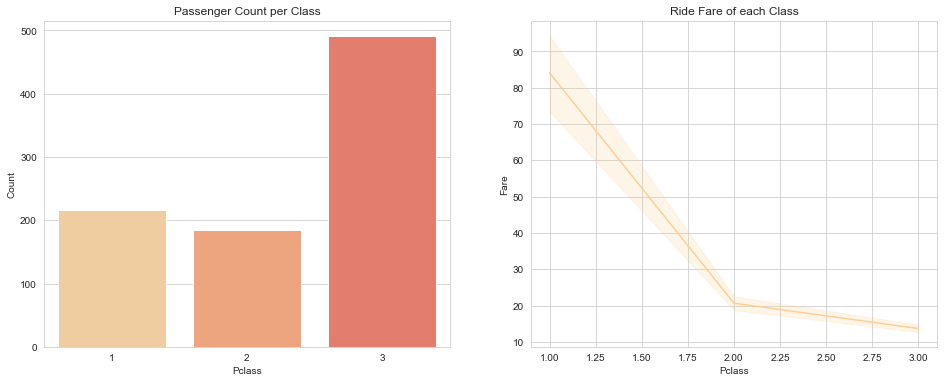

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Pclass', data=train, ax=ax[0])
ax[0].set_title('Passenger Count per Class')
ax[0].set_ylabel('Count')
sns.lineplot(x='Pclass', y='Fare', data=train, ax=ax[1])
ax[1].set_title('Ride Fare of each Class')
plt.show()

> *Observation(s)* :
>
>    - A significant difference between count in Class-3 when compared to the other two
>    - Class-3 exceeds by more than double the value of the second most (Class-1)
>    - Whereas, Class-2 being the least in count, has a reasonable difference with Class-1
>    - The difference in Count-per-Class is reflected in Fare-per-Class
>    - We can see the co-relation between the Classes and the Fares of the same

In [10]:
class_count = train['Pclass'].value_counts().sort_index().tolist()
class_survived = train[train['Survived'] == 1]['Pclass'].value_counts().sort_index().tolist()

print("Count-per-Class    :", class_count)
print("Survived-per-Class :", class_survived)

class_survival_rate = []
for i in range(3):
    class_survival_rate.append(int((class_survived[i]/class_count[i])*100))

Count-per-Class    : [216, 184, 491]
Survived-per-Class : [136, 87, 119]


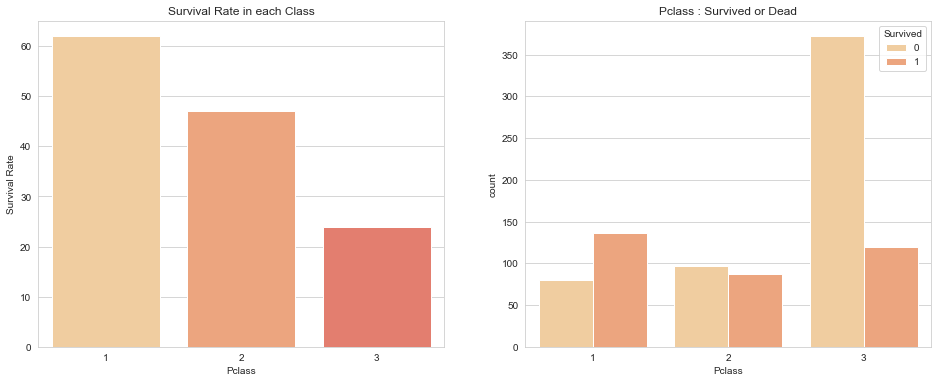

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=[1, 2, 3], y=class_survival_rate, ax=ax[0])
ax[0].set_title('Survival Rate in each Class')
ax[0].set_xlabel('Pclass')
ax[0].set_ylabel('Survival Rate')
sns.countplot(x='Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass : Survived or Dead')
plt.show()

> *Observation(s)* :
>    - Class-1 (wealthiest) had better survival rate of the three
>    - Whereas, Class-3 (least wealthy) had the lowest survival rate
>    - Also, in Class-3, lot more people died than survived (more than double)
>    - Whereas, in Class-1, more people survived than died (only class with that scenario)

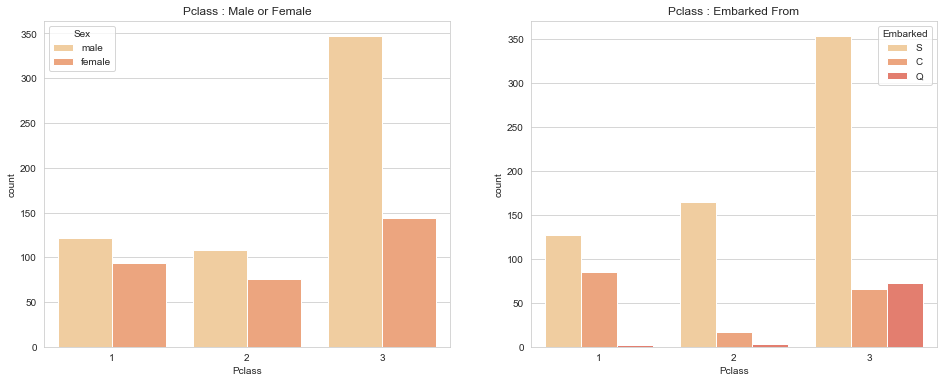

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Pclass', hue='Sex', data=train, ax=ax[0])
ax[0].set_title("Pclass : Male or Female")
sns.countplot(x='Pclass', hue='Embarked', data=train, ax=ax[1])
ax[1].set_title("Pclass : Embarked From")
plt.show()

> *Observation(s)* :
>    - Male-to-Female ratio is large in Class-3 when compared to that of others
>    - Embarkment C (Cherbourg) has most passengers from Class-1, least in Class-2
>    - Embarkment S (Southampton) and Q (Queenstown) had most passengers from Class-3

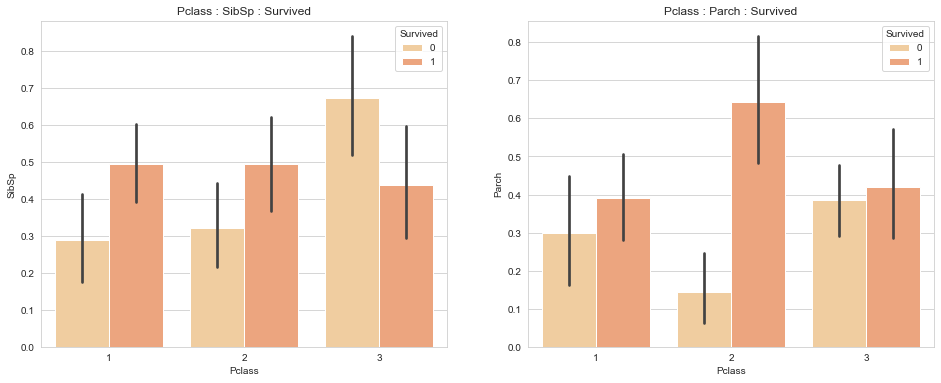

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x='Pclass', y='SibSp', hue='Survived', data=train, ax=ax[0])
ax[0].set_title('Pclass : SibSp : Survived')
sns.barplot(x='Pclass', y='Parch', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass : Parch : Survived')
plt.show()

> *Observation(s)* :
>    - Except Class-3, in every class having a sibling/spouse increases chance of survival
>    - In every class, Families (Parents and Children) have better rate of survival

**---------------------------------------------------------------------------------------------**

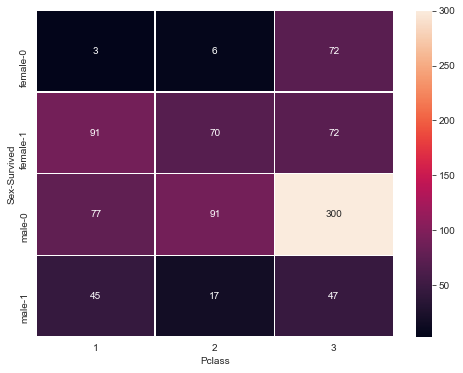

In [14]:
plt.figure(figsize=(8, 6))
df = pd.DataFrame(pd.crosstab([train['Sex'], train['Survived']], train['Pclass'], margins=True))
df.drop('All', axis=1, inplace=True)
df.drop('All', axis=0, inplace=True, level=0)
sns.heatmap(df, annot=True, fmt='d', linewidth=.5)
plt.show()
# In class-1, almost double the amount of Females survived than Males
# and very few Females of class-1 died when compared to other classes
# In class-2, Female survival rate to Male is a lot more than in class-1
# Whereas, the Male death rate to Female has also increased by a small amount
# In class-3, the overall survival rate is very low
# A very large number of Men and Women died but the survival ratio of Men

**---------------------------------------------------------------------------------------------**

### Age : (PassengerAge)

In [15]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
train['Age'].isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

ageMedian value : 28
Replacing NAN ageValues with ageMedian...
train['Age'] NAN value count : 0


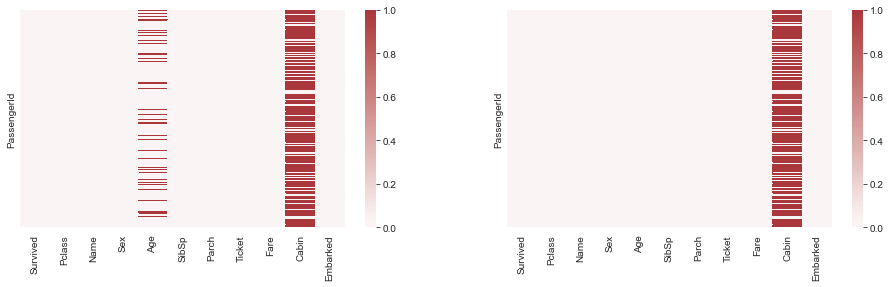

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.heatmap(train.isnull(), yticklabels=False, cmap='vlag', center=0, ax=ax[0])

print("ageMedian value :", int(train['Age'].median()))
print("Replacing NAN ageValues with ageMedian...")
train['Age'].fillna(int(train['Age'].median()), inplace=True)
print("train['Age'] NAN value count :", train['Age'].isna().sum())

sns.heatmap(train.isnull(), yticklabels=False, cmap='vlag', center=0, ax=ax[1])
plt.show()

In [18]:
train['Age_Group'] = train['Age'].apply(lambda x : int(x/10))
print("Grouping age to ageGroups --> 0-10, 10-20 and so on...")

Grouping age to ageGroups --> 0-10, 10-20 and so on...


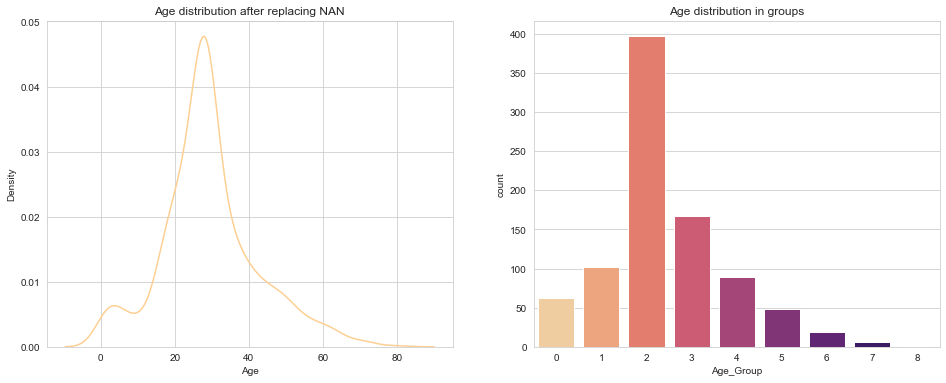

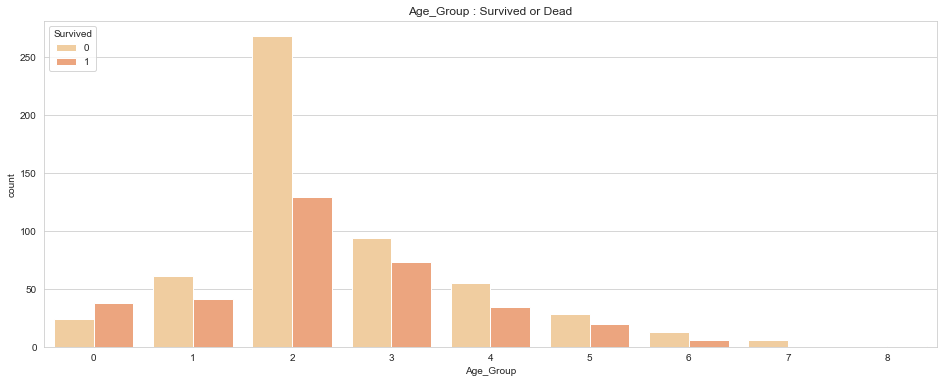

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.kdeplot(x='Age', data=train, ax=ax[0])
ax[0].set_title("Age distribution after replacing NAN")

sns.countplot(x='Age_Group', data=train, ax=ax[1])
ax[1].set_title("Age distribution in groups")
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(x='Age_Group', hue='Survived', data=train)
plt.title("Age_Group : Survived or Dead")
plt.show()

> *Observation(s)* :
>    - The 117 Missing ageValues were replaced with ageMedian (28)
>    - We can see that there were more children/teenagers and adults than elders
>    - Most passengers (After NAN replacement) were in their 20's
>    - Except children (0-10), in every ageGroup there were more dead than survived

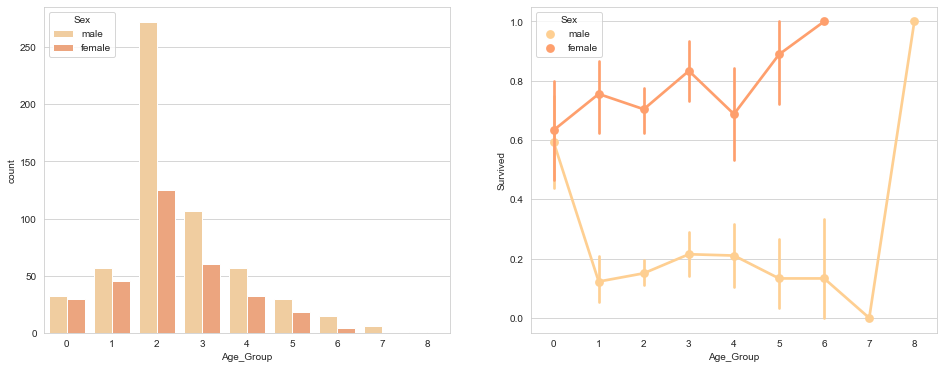

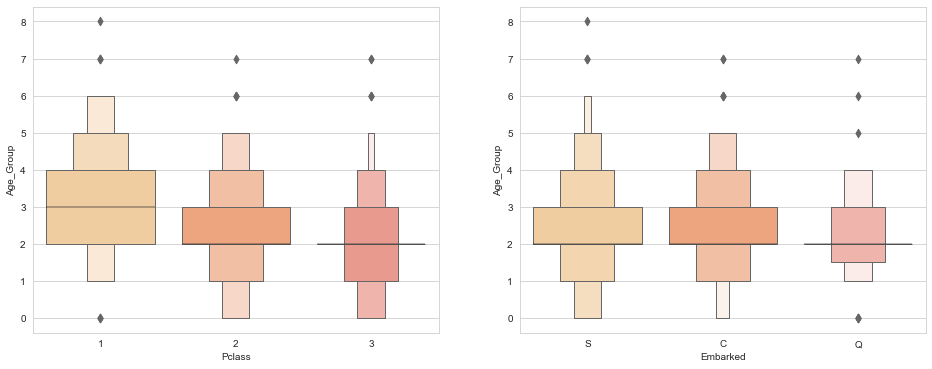

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
sns.countplot(x='Age_Group', hue='Sex', data=train, ax=ax[0])
sns.pointplot(x='Age_Group', y='Survived', hue='Sex', data=train, kind='point', ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)
sns.boxenplot(y='Age_Group', x='Pclass', data=train, ax=ax[0])
sns.boxenplot(y='Age_Group', x='Embarked', data=train, ax=ax[1])
# plt.title("Age_Group : Male or Female")
plt.show()

> *Observation(s)* :
>    - Except ageGroup 20-50, the Male-to-Female ratio is pretty less
>    - Almost equal number of passengers of Class-1 and Class-2 from the ageGroup 10-40
>    - In the ageGroup 0-40 there are more Class-3 Passengers than any other and Class-1 for the rest
>    - Almost every ageGroup had more passengers embarked from S than any other, followed by C

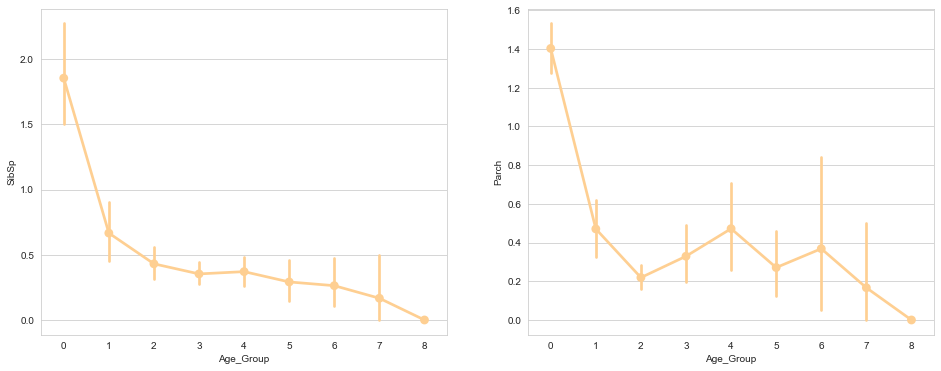

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.pointplot(x='Age_Group', y='SibSp', data=train, ax=ax[0])
sns.pointplot(x='Age_Group', y='Parch', data=train, ax=ax[1])
plt.show()

> *Observation(s)*:
>    - Lowest Female survival rate between 0-10 age
>    - Highest Female survival rate between 60-70 age
>    - Highest Male survival rate between 0-10 and 80-90
>    - Lowest Male survival rate between 70-80

### Embarked : (PassengerEmbarkment)

In [22]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
train['Embarked'].fillna(value='S', inplace=True)
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

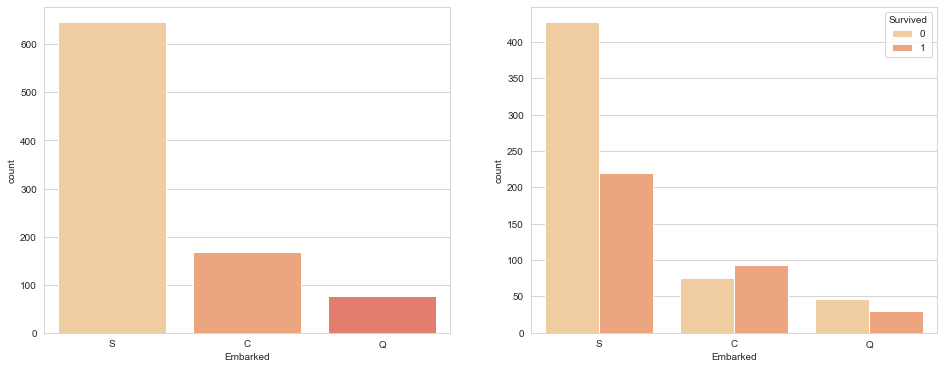

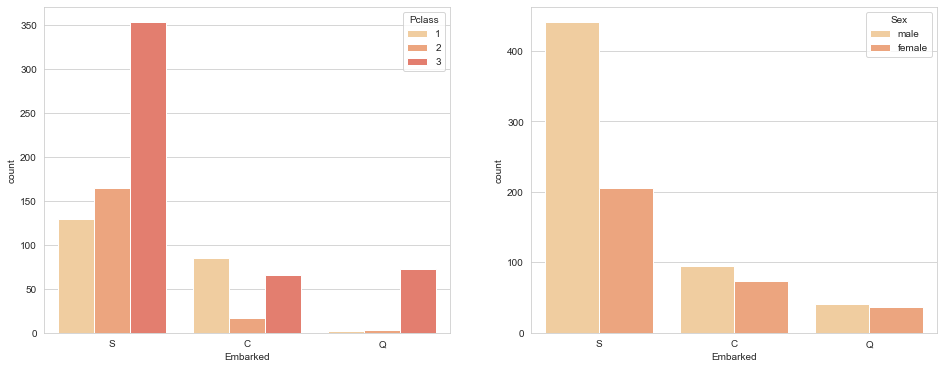

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Embarked', data=train, ax=ax[0])
sns.countplot(x='Embarked', hue='Survived', data=train, ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Embarked', hue='Pclass', data=train, ax=ax[0])
sns.countplot(x='Embarked', hue='Sex', data=train, ax=ax[1])
plt.show()

> *Observation(s)*:
>    - Most passengers were embarked in S (Southampton)
>    - Highest survival rate is in C (Cherbough), followed by Q (Queenstown) and then S (Southampton)
>    - C (Cherbough) has the majority of passengers from Class-1 whereas in other two its Class-3
>    - Male-to-Female ratio increases as Q -> C -> S, while Q having almost a 1:1 ratio

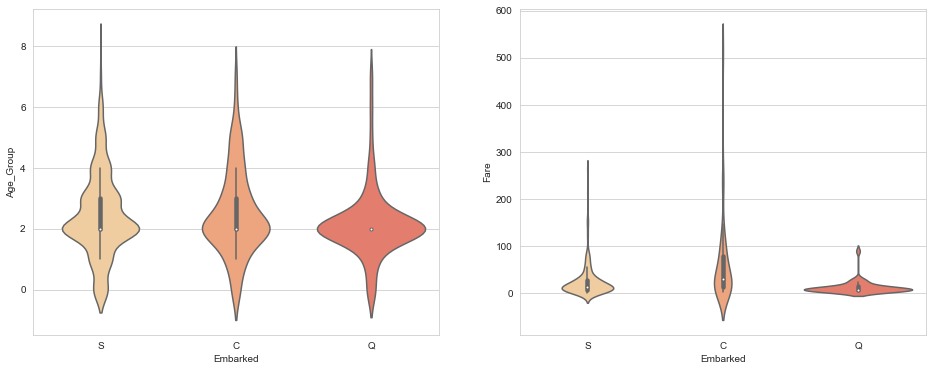

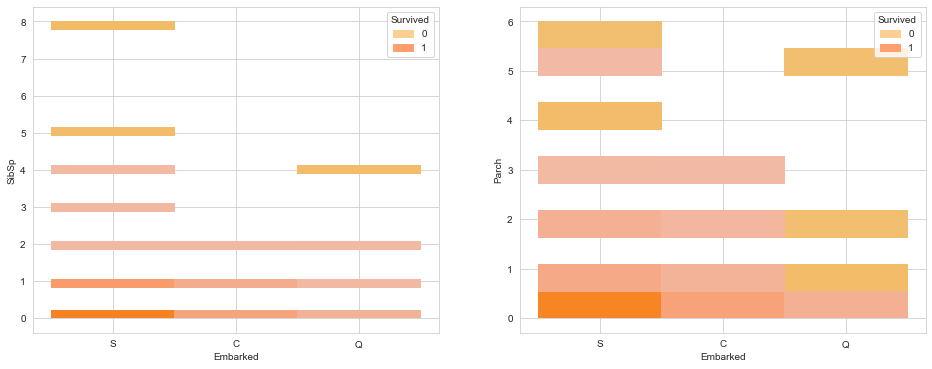

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# sns.boxenplot(x='Embarked', y='Age_Group', hue='Survived', data=train, ax=ax[0])
sns.violinplot(x='Embarked', y='Age_Group', data=train, ax=ax[0])
sns.violinplot(x='Embarked', y='Fare', data=train, ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(x='Embarked', y='SibSp', hue='Survived', data=train, ax=ax[0])
sns.histplot(x='Embarked', y='Parch', hue='Survived', data=train, ax=ax[1])
plt.show()

> *Observation(s)*:
>    - In all the three, most passengers were of the ageGroup 20-30
>    - Fare was the lowest at embarkment Q and the highest in embarkment C but the average was moreover the same in each
>    - All the embarkments had majority of surviving passengers with fewer siblings/spouses 
>    - Except Q, all embarkments had majority of surviving small-families

### Sex : (PassengerGender)

In [26]:
train['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

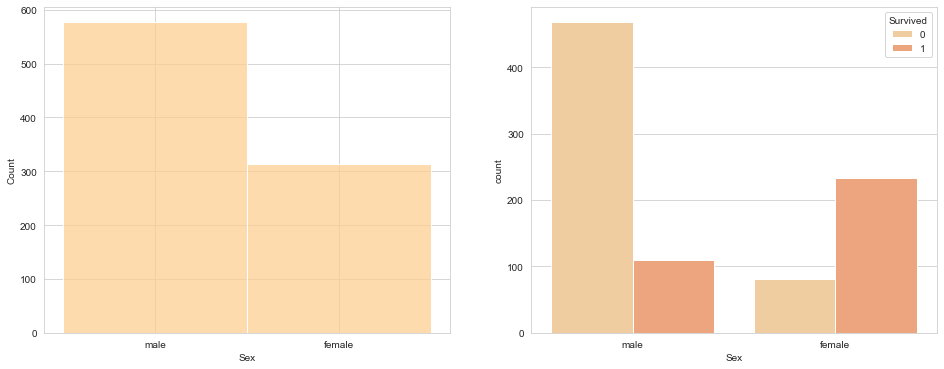

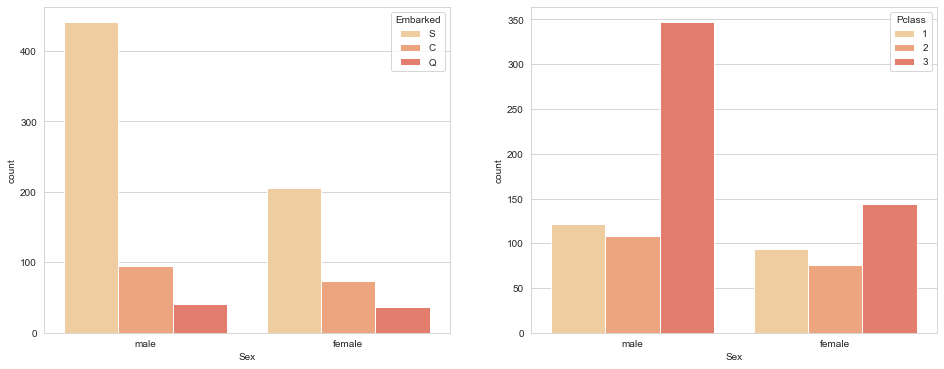

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(x='Sex', data=train, ax=ax[0])
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(x='Sex', hue='Embarked', data=train, ax=ax[0])
sns.countplot(x='Sex', hue='Pclass', data=train, ax=ax[1])
plt.show()

> *Observation(s)*:
>    - Nearly double the passengers the men when compared to females
>    - Survival rate in men was very less, whereas, it was really good in the women passengers
>    - In all embarkments, there were more males than females (Q being the closest to 1:1)
>    - In every class, there were more males than females (Class-3 having the highest ratio)

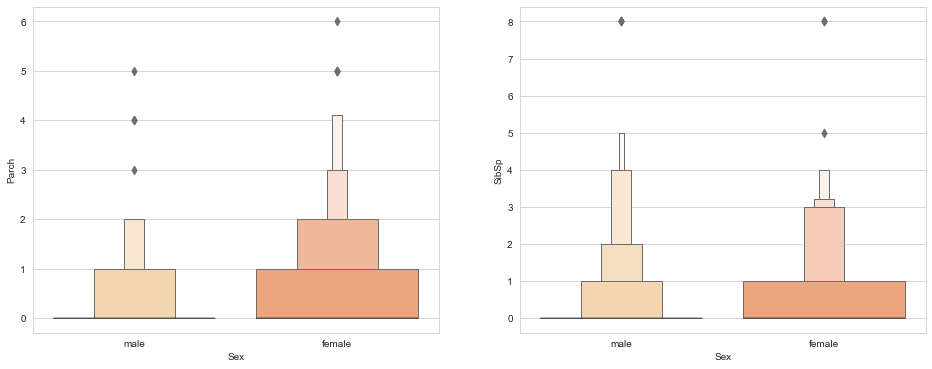

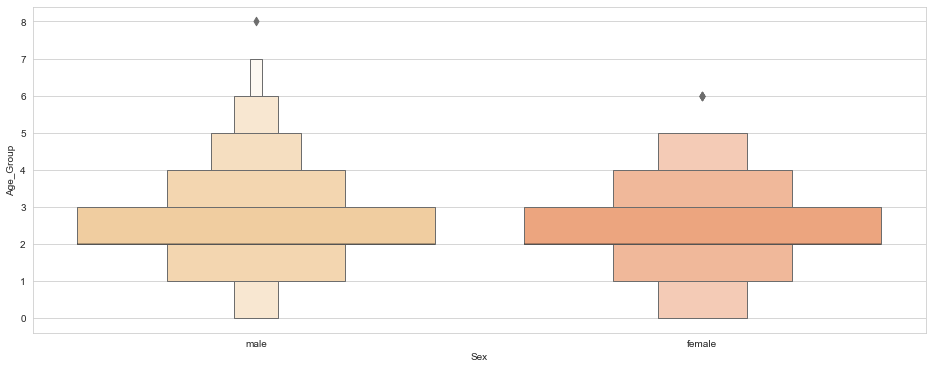

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxenplot(x='Sex', y='Parch', data=train, ax=ax[0])
sns.boxenplot(x='Sex', y='SibSp', data=train, ax=ax[1])
plt.show()

plt.figure(figsize=(16, 6))
sns.boxenplot(x='Sex', y='Age_Group', data=train)
plt.show()

> *Observation(s)*:
>    - More females were part of family passengers, big or small
>    - Most females had no siblings/spouses travelling with them
>    - Age group 10-40, had similar count of Male-Female passengers
>    - Whereas, in 0-10 there were more females and in 50-80, more males

### Fare (Passenger Fare)

In [29]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [30]:
train['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

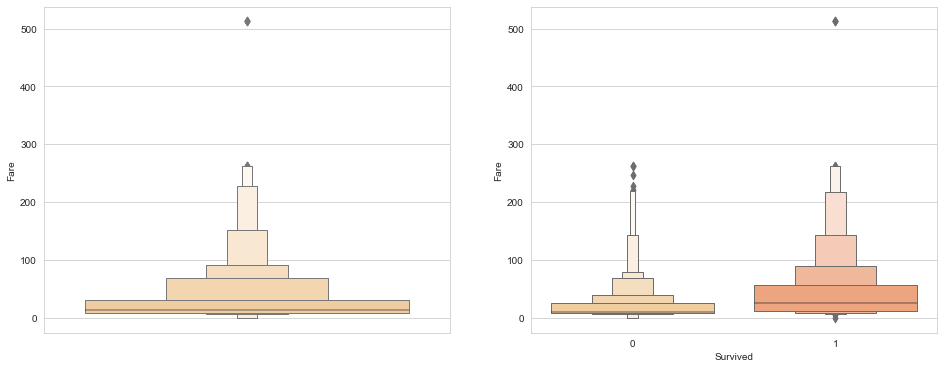

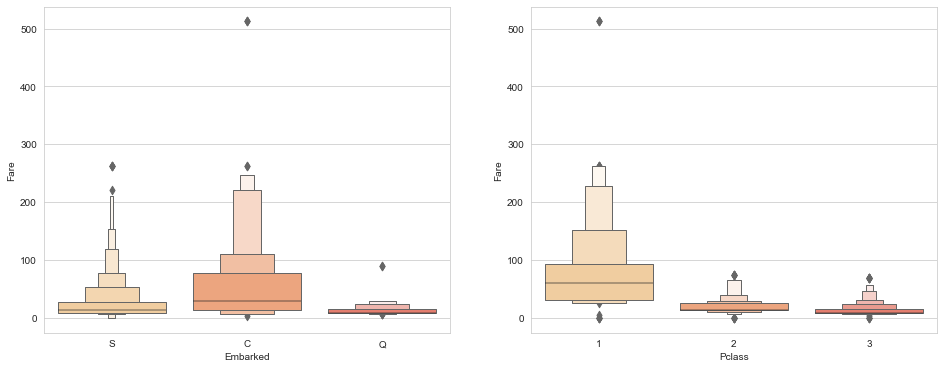

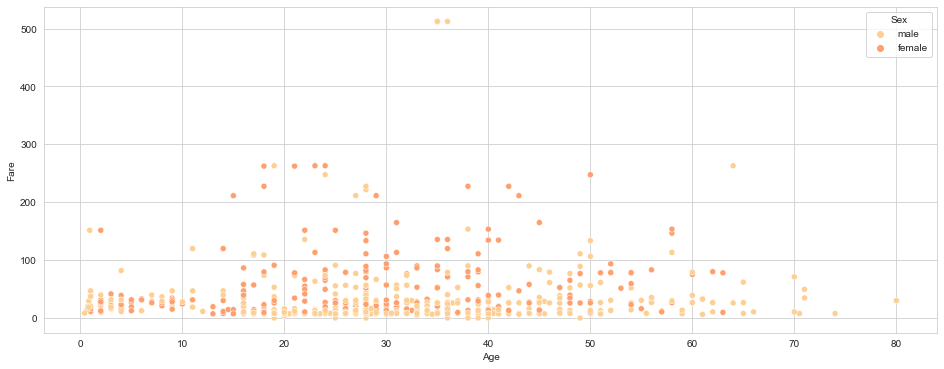

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxenplot(y='Fare', data=train, ax=ax[0])
sns.boxenplot(y='Fare', x='Survived', data=train, ax=ax[1])
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.boxenplot(y='Fare', x='Embarked', data=train, ax=ax[0])
sns.boxenplot(y='Fare', x='Pclass', data=train, ax=ax[1])
plt.show()

plt.figure(figsize=(16, 6))
sns.scatterplot(y='Fare', x='Age', hue='Sex', data=train)
plt.show()

> *Observation(s)*:
>    - Majority of the passengers had a fare of less than hundred
>    - Most passengers who had a higher fare seem to have survived than dead
>    - Average fares in all embarkments was almost similar except C, where the avg is a lot higher
>    - Class-1 had higher fares overall, followed by class-2 and then class-3
>    - Between age group 15-45, the fares had a rise with Females paying more than Men
>    - Overall average of fares was more or less the same in each age group

In [32]:
train.drop(columns=['Name', 'Age'], inplace=True)
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
PassengerId,,,,,,,,,,
1,0,3,male,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,female,1,0,PC 17599,71.2833,C85,C,3
3,1,3,female,0,0,STON/O2. 3101282,7.9250,NaN,S,2
4,1,1,female,1,0,113803,53.1000,C123,S,3
5,0,3,male,0,0,373450,8.0500,NaN,S,3


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   SibSp      891 non-null    int64  
 4   Parch      891 non-null    int64  
 5   Ticket     891 non-null    object 
 6   Fare       891 non-null    float64
 7   Cabin      204 non-null    object 
 8   Embarked   891 non-null    object 
 9   Age_Group  891 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 116.6+ KB


### Cabin : (Passenger Cabin)

In [34]:
train['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [35]:
print("Null values in Cabin column :", train['Cabin'].isna().sum())

Null values in Cabin column : 687


### SibSp (Passenger siblings/spouses)

In [36]:
# train['SibSp'].describe()

In [37]:
# train['SibSp'].value_counts()

In [38]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# sns.countplot(x='SibSp', data=train, ax=ax[0])
# sns.histplot(x='SibSp', y='Survived', data=train, ax=ax[1])
# plt.show()

In [39]:
# fig, ax = plt.subplots(1, 2, figsize=(16, 6))
# sns.histplot(x='SibSp', y='Parch', data=train, ax=ax[0])
# sns.boxenplot(x='SibSp', y='Age', data=train, ax=ax[1])
# plt.show()

In [40]:
# fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
# sns.kdeplot(x='SibSp', hue='Embarked', data=train, ax=ax[0])
# sns.kdeplot(x='SibSp', hue='Pclass', data=train, ax=ax[1])
# sns.kdeplot(x='SibSp', hue='Sex', data=train, ax=ax[2])
# plt.show()

In [41]:
# plt.figure(figsize=(14, 6))
# sns.barplot(y='SibSp', x='Survived', hue='Age_Group', data=train)
# plt.show()

In [42]:
# train['Parch'].describe()

In [43]:
# train['Parch'].value_counts()

In [44]:
# fig, ax = plt.subplots(1, 2, figsize=(14, 6))
# sns.barplot(x='Parch', y='Survived', data=train, ax=ax[0])
# sns.boxplot(x='Parch', y='Age', data=train, ax=ax[1])
# plt.show()

In [45]:
# fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
# sns.kdeplot(x='Parch', hue='Embarked', data=train, ax=ax[0])
# sns.kdeplot(x='Parch', hue='Pclass', data=train, ax=ax[1])
# sns.kdeplot(x='Parch', hue='Sex', data=train, ax=ax[2])
# plt.show()

In [46]:
# plt.figure(figsize=(14, 6))
# sns.barplot(y='Parch', x='Survived', hue='Age_Group', data=train)
# plt.show()